In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
# Load dataset
df = pd.read_csv('Universities_Schoolarships_All_Around_the_World.csv')

# Preview data
df.head(20)

,Unnamed: 0,title,degrees,funds,date,location
0,0,Schaefer Halleen’s Social Equity Scholarship,"Master, Bachelor, Phd",$1000,30 June 2022,united-states
1,1,President’s Scholarship for Ukraine,"Master, Bachelor, Phd, Course",$2500,31 July 2022,united-states
2,2,International Students Diversity Contest 2022-...,"Master, Bachelor, Phd, Course","Up to $2,000",22 December 2022,united-states
3,3,Master in Business Administration 80% OFF your...,Master,80% Tuition Fees,15 September 2022,united-states
4,4,Improve Men’s Health Scholarship,"Master, Bachelor, Phd",$2000,31 May 2022,united-states
5,5,3 Month F1 Visa Study English in USA Scholarsh...,Course,$1455,1 July 2022,united-states
6,6,ArtUniverse,"Master, Course",Full or partial scholarship,30 December 2022,united-states
7,7,American Indian Scholarships at Augsburg Unive...,Bachelor,Partial tuition fees,1 December 2022,united-states
8,8,International Contest for Students Support 202...,"Master, Bachelor, Course","Up to $2,000 awards",28 April 2023,united-states
9,9,Scholarships for Africa,"Master, Bachelor, Phd, Course",$100 to $3000,24 March 2027,united-states


In [9]:
# Remove index column
df = df.drop(columns=["Unnamed: 0"])

# Clean column names
df.columns = df.columns.str.strip()

# Lowercase locations for consistency
df["location"] = df["location"].str.lower()

# Remove duplicates
df = df.drop_duplicates()

df.info()

<class 'pandas.DataFrame'>
Index: 877 entries, 0 to 878
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   title     877 non-null    str  
 1   degrees   828 non-null    str  
 2   funds     792 non-null    str  
 3   date      586 non-null    str  
 4   location  877 non-null    str  
dtypes: str(5)
memory usage: 41.1 KB


location
united-kingdom    307
united-states     181
canada             98
europe             62
south-africa       58
india              58
pakistan           57
nigeria            56
Name: count, dtype: int64


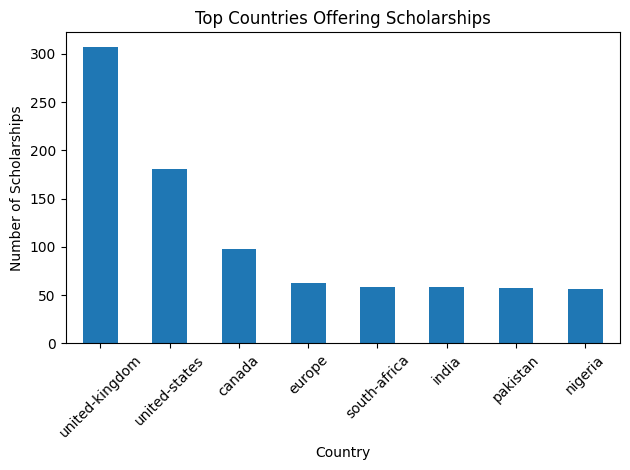

In [10]:
top_countries = df["location"].value_counts().head(10)
print(top_countries)

plt.figure()
# Create a bar plot of the top 10 countries by scholarship count
top_countries.plot(kind="bar")

plt.title("Top Countries Offering Scholarships")
plt.xlabel("Country")
plt.ylabel("Number of Scholarships")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("countries.png")
plt.show()

In [11]:
# Split multiple degrees into rows
degrees_split = df.assign(
    degrees=df["degrees"].str.split(", ")
).explode("degrees")

degree_counts = degrees_split["degrees"].value_counts()

degree_counts

degrees
Master          461
Bachelor        420
Phd             289
Course          211
Not Funded       19
Fully Funded      8
Name: count, dtype: int64

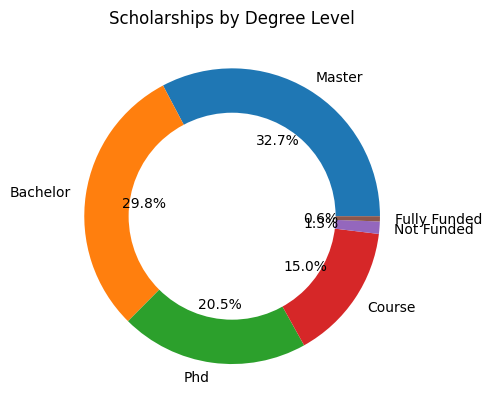

In [12]:
plt.figure()
degree_counts.plot(kind="pie", autopct="%1.1f%%")

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Scholarships by Degree Level")
plt.ylabel("")

plt.savefig("degree_donut.png", dpi=300)
plt.show()

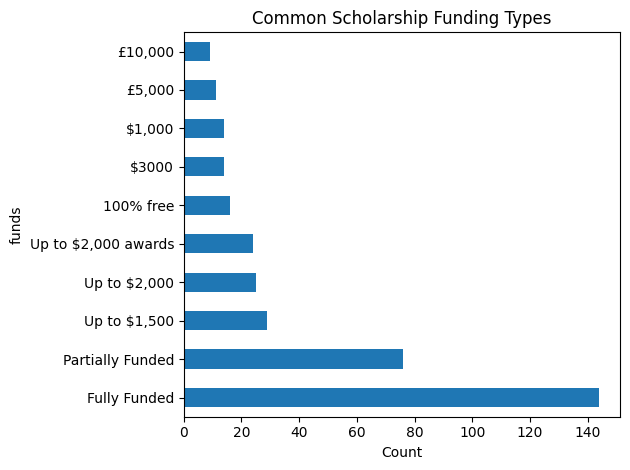

In [13]:
plt.figure()
# Create a horizontal bar plot of the top 10 most common scholarship funding types
df["funds"].value_counts().head(10).plot(kind="barh")

plt.title("Common Scholarship Funding Types")
plt.xlabel("Count")

plt.tight_layout()

plt.savefig("funding.png")
plt.show()